<a href="https://colab.research.google.com/github/jai2shan/TSAI-EVA40-Assignments/blob/master/Session%2011/Assignment%2011%20Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
os.chdir(r'/content')
# !git clone https://github.com/jai2shan/TSAI-EVA40-Assignments.git
import os
os.chdir(r'/content/TSAI-EVA40-Assignments/Session 11/asgnmt11')

In [0]:
from torchvision import transforms
from DataLoader import cifar_data_loader,View_images
import torch
from torchsummary import summary
from assignment11_model import Net

from LR_Finder_acc import *
from LR_Min_Max import *
from Training_Testing import TrainTest
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR
from ModelPerformance import *
from gradcam import GradCamDisplay
import PIL
from gradcam import *
import copy

In [3]:
### Data Loading
trainloader,testloader = cifar_data_loader(BatchSize=512)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

net = Net().to(device)
summary(net, input_size=(3,32,32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1,

## Estimating LR Max


Learning rate search finished. See the graph with {finder_name}.plot()


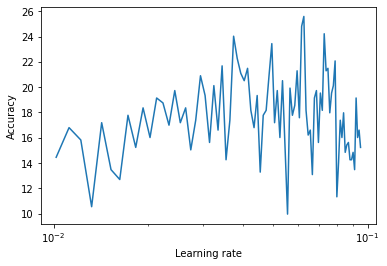

62    0.062664
Name: lr, dtype: float64

In [5]:
lr_max = LR_Max(net,trainloader,1e-4,0.1,iters = 100,mode = 'linear')
lr_max

## Estimating LR Min


In [6]:
lr_min =  LR_Min(trainloader,lr_max)

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=2.471957206726074 Batch_id=97 Accuracy=16.58: 100%|██████████| 98/98 [00:32<00:00,  3.03it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.797684669494629 Batch_id=97 Accuracy=25.29: 100%|██████████| 98/98 [00:32<00:00,  3.03it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 2


Loss=1.8675775527954102 Batch_id=97 Accuracy=33.98: 100%|██████████| 98/98 [00:32<00:00,  3.03it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 3


Loss=1.5551087856292725 Batch_id=97 Accuracy=40.65: 100%|██████████| 98/98 [00:32<00:00,  3.03it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 4


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=2.090104341506958 Batch_id=97 Accuracy=18.61: 100%|██████████| 98/98 [00:32<00:00,  3.01it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.7657865285873413 Batch_id=97 Accuracy=30.49: 100%|██████████| 98/98 [00:32<00:00,  2.97it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 2


Loss=1.7678202390670776 Batch_id=97 Accuracy=39.37: 100%|██████████| 98/98 [00:32<00:00,  2.99it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 3


Loss=1.583094596862793 Batch_id=97 Accuracy=46.07: 100%|██████████| 98/98 [00:32<00:00,  3.02it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 4


Loss=1.3403691053390503 Batch_id=97 Accuracy=50.78: 100%|██████████| 98/98 [00:32<00:00,  2.97it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=2.4596385955810547 Batch_id=97 Accuracy=16.68: 100%|██████████| 98/98 [00:32<00:00,  3.03it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.9975427389144897 Batch_id=97 Accuracy=30.25: 100%|██████████| 98/98 [00:32<00:00,  3.02it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 2


Loss=1.6023550033569336 Batch_id=97 Accuracy=38.69: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 3


Loss=1.5021860599517822 Batch_id=97 Accuracy=44.49: 100%|██████████| 98/98 [00:32<00:00,  3.03it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 4


Loss=1.289109468460083 Batch_id=97 Accuracy=49.85: 100%|██████████| 98/98 [00:32<00:00,  3.03it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=2.0252299308776855 Batch_id=97 Accuracy=18.29: 100%|██████████| 98/98 [00:32<00:00,  3.03it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.7193101644515991 Batch_id=97 Accuracy=32.93: 100%|██████████| 98/98 [00:32<00:00,  3.01it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 2


Loss=1.473554253578186 Batch_id=97 Accuracy=42.04: 100%|██████████| 98/98 [00:32<00:00,  3.03it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 3


Loss=1.3726874589920044 Batch_id=97 Accuracy=49.43: 100%|██████████| 98/98 [00:32<00:00,  3.03it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 4


Loss=1.2106430530548096 Batch_id=97 Accuracy=54.01: 100%|██████████| 98/98 [00:32<00:00,  3.03it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.7888315916061401 Batch_id=97 Accuracy=22.19: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.5860203504562378 Batch_id=97 Accuracy=38.98: 100%|██████████| 98/98 [00:32<00:00,  3.00it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 2


Loss=1.3676196336746216 Batch_id=97 Accuracy=46.68: 100%|██████████| 98/98 [00:32<00:00,  3.03it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 3


Loss=1.1949713230133057 Batch_id=97 Accuracy=52.77: 100%|██████████| 98/98 [00:32<00:00,  3.04it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 4


Loss=1.2034214735031128 Batch_id=97 Accuracy=56.84: 100%|██████████| 98/98 [00:32<00:00,  3.01it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.8453844785690308 Batch_id=97 Accuracy=22.42: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.6242296695709229 Batch_id=97 Accuracy=38.04: 100%|██████████| 98/98 [00:32<00:00,  3.04it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 2


Loss=1.4073474407196045 Batch_id=97 Accuracy=46.81: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 3


Loss=1.2109723091125488 Batch_id=97 Accuracy=52.41: 100%|██████████| 98/98 [00:31<00:00,  3.06it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 4


Loss=1.0949335098266602 Batch_id=97 Accuracy=57.02: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]


In [7]:
print('LR Min is ',lr_min)

LR Min is  0.006962626262626263


In [0]:
tt = TrainTest()
test_acc = 0
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.1, momentum = 0.9)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer,
                                          max_lr = lr_max.values[0], 
                                          pct_start = 0.2, # 5/24
                                          epochs =24,
                                          steps_per_epoch=len(trainloader))

net = Net().to(device)
for epoch in range(24):
    print("EPOCH:", epoch)
    tt.train_(net, device, trainloader, optimizer, criterion, epoch,L1 = False)
    acc = tt.test_(net, device, testloader)  
    scheduler.step()
       
print('Finished Training')

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=3.8321409225463867 Batch_id=97 Accuracy=10.31: 100%|██████████| 98/98 [00:33<00:00,  2.90it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 3.1134, Accuracy: 1118/10000 (11.18%)

EPOCH: 1


Loss=3.513291835784912 Batch_id=97 Accuracy=10.20: 100%|██████████| 98/98 [00:32<00:00,  2.99it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 3.1154, Accuracy: 1126/10000 (11.26%)

EPOCH: 2


Loss=3.6702709197998047 Batch_id=97 Accuracy=10.28: 100%|██████████| 98/98 [00:32<00:00,  3.02it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 3.1067, Accuracy: 1126/10000 (11.26%)

EPOCH: 3


Loss=3.735208034515381 Batch_id=97 Accuracy=10.33: 100%|██████████| 98/98 [00:32<00:00,  3.00it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 3.1021, Accuracy: 1123/10000 (11.23%)

EPOCH: 4


Loss=3.6862125396728516 Batch_id=97 Accuracy=10.23: 100%|██████████| 98/98 [00:32<00:00,  3.01it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 3.1246, Accuracy: 1118/10000 (11.18%)

EPOCH: 5


Loss=3.909419059753418 Batch_id=97 Accuracy=10.25: 100%|██████████| 98/98 [00:32<00:00,  2.99it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 3.1058, Accuracy: 1121/10000 (11.21%)

EPOCH: 6


Loss=3.6261179447174072 Batch_id=97 Accuracy=10.27: 100%|██████████| 98/98 [00:32<00:00,  3.02it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 3.1220, Accuracy: 1120/10000 (11.20%)

EPOCH: 7


Loss=3.395390033721924 Batch_id=97 Accuracy=10.24: 100%|██████████| 98/98 [00:32<00:00,  3.03it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 3.1281, Accuracy: 1123/10000 (11.23%)

EPOCH: 8


Loss=3.7371201515197754 Batch_id=97 Accuracy=10.28: 100%|██████████| 98/98 [00:32<00:00,  2.98it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 3.1109, Accuracy: 1130/10000 (11.30%)

EPOCH: 9


Loss=3.503718376159668 Batch_id=97 Accuracy=10.19: 100%|██████████| 98/98 [00:32<00:00,  3.02it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 3.1304, Accuracy: 1116/10000 (11.16%)

EPOCH: 10


Loss=3.799332857131958 Batch_id=97 Accuracy=10.22: 100%|██████████| 98/98 [00:32<00:00,  3.00it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 3.1520, Accuracy: 1123/10000 (11.23%)

EPOCH: 11


Loss=3.605323076248169 Batch_id=97 Accuracy=10.25: 100%|██████████| 98/98 [00:32<00:00,  3.01it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 3.1260, Accuracy: 1116/10000 (11.16%)

EPOCH: 12


Loss=3.7232143878936768 Batch_id=97 Accuracy=10.32: 100%|██████████| 98/98 [00:32<00:00,  3.02it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 3.1362, Accuracy: 1124/10000 (11.24%)

EPOCH: 13


Loss=3.735917329788208 Batch_id=97 Accuracy=10.38: 100%|██████████| 98/98 [00:32<00:00,  3.00it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 3.1204, Accuracy: 1131/10000 (11.31%)

EPOCH: 14


Loss=3.805762529373169 Batch_id=97 Accuracy=10.31: 100%|██████████| 98/98 [00:32<00:00,  3.01it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 3.1076, Accuracy: 1123/10000 (11.23%)

EPOCH: 15


Loss=3.609833240509033 Batch_id=97 Accuracy=10.29: 100%|██████████| 98/98 [00:32<00:00,  2.99it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 3.1347, Accuracy: 1114/10000 (11.14%)

EPOCH: 16


Loss=3.8363254070281982 Batch_id=97 Accuracy=10.25: 100%|██████████| 98/98 [00:32<00:00,  3.00it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 3.1208, Accuracy: 1117/10000 (11.17%)

EPOCH: 17


Loss=3.6810336112976074 Batch_id=97 Accuracy=10.36: 100%|██████████| 98/98 [00:32<00:00,  3.00it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 3.1221, Accuracy: 1121/10000 (11.21%)

EPOCH: 18


Loss=3.763235569000244 Batch_id=97 Accuracy=10.30: 100%|██████████| 98/98 [00:32<00:00,  3.01it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 3.1108, Accuracy: 1123/10000 (11.23%)

EPOCH: 19


Loss=3.7166969776153564 Batch_id=97 Accuracy=10.24: 100%|██████████| 98/98 [00:32<00:00,  3.01it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 3.1431, Accuracy: 1116/10000 (11.16%)

EPOCH: 20


Loss=3.8722481727600098 Batch_id=80 Accuracy=10.20:  82%|████████▏ | 80/98 [00:27<00:04,  3.67it/s]